# Importing Libraries and dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
#importing dataset
url = 'https://raw.githubusercontent.com/sourajitaghosh/DataScienceSupplierRiskPrediction/main/supplier_data.csv'
dtf = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
#iporting dataset after loading file above
#from google.colab import files
#uploaded = files.upload()
#dtf = pd.read_csv('supplier_data.csv')
dtf

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,0.201,0.260,0.060,0.823,0.220,0.745,0.614,Average,0.804,...,0.269,0.010,0.502,0.154,0.547,0.407,0.813,0.135,0.277,1
996,1997,0.128,0.408,0.611,0.774,0.351,0.615,0.114,Bad,0.359,...,0.507,0.652,0.212,0.135,0.596,0.996,0.081,0.069,0.905,1
997,1998,0.910,0.308,0.381,0.818,0.671,0.500,0.031,Average,0.374,...,0.470,0.401,0.677,0.072,0.744,0.520,0.748,0.069,0.403,1
998,1999,0.408,0.271,0.921,0.648,0.948,0.562,0.050,Bad,0.627,...,0.372,0.093,0.694,0.154,0.957,0.930,0.280,0.863,0.959,1


# Changing data in dataframe (target columns)

In [4]:

#In the target column, replace 1 with 0 and 2 with 1. So that the defaulters will become positive class.
dtf['Supplier’s default']= dtf['Supplier’s default'].replace('1', 0)
dtf['Supplier’s default']= dtf['Supplier’s default'].replace('2', 1)
dtf

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,0.201,0.260,0.060,0.823,0.220,0.745,0.614,Average,0.804,...,0.269,0.010,0.502,0.154,0.547,0.407,0.813,0.135,0.277,1
996,1997,0.128,0.408,0.611,0.774,0.351,0.615,0.114,Bad,0.359,...,0.507,0.652,0.212,0.135,0.596,0.996,0.081,0.069,0.905,1
997,1998,0.910,0.308,0.381,0.818,0.671,0.500,0.031,Average,0.374,...,0.470,0.401,0.677,0.072,0.744,0.520,0.748,0.069,0.403,1
998,1999,0.408,0.271,0.921,0.648,0.948,0.562,0.050,Bad,0.627,...,0.372,0.093,0.694,0.154,0.957,0.930,0.280,0.863,0.959,1


# Working with missing data


In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            1000 non-null   int64  
 1   Cost                   1000 non-null   float64
 2   Quality                999 non-null    float64
 3   Delivery time          1000 non-null   float64
 4   Reliability            998 non-null    float64
 5   Flexibility            998 non-null    float64
 6   Capacity               999 non-null    float64
 7   Innovation             998 non-null    float64
 8   Reputation             998 non-null    object 
 9   Financial stability    1000 non-null   float64
 10  Environmental impact   1000 non-null   float64
 11  Social responsibility  1000 non-null   float64
 12  Safety record          1000 non-null   float64
 13  Technical expertise    1000 non-null   float64
 14  Customer service       1000 non-null   float64
 15  Lead 

In [6]:
print(dtf.isnull().sum())

Supplier ID              0
Cost                     0
Quality                  1
Delivery time            0
Reliability              2
Flexibility              2
Capacity                 1
Innovation               2
Reputation               2
Financial stability      0
Environmental impact     0
Social responsibility    0
Safety record            0
Technical expertise      0
Customer service         0
Lead time                0
Responsiveness           1
Contract terms           1
Diversity                0
Sustainability           1
Scalability              1
Supplier’s default       0
dtype: int64


In [7]:
#negligible missing values above so will retain the dataset as is and not do any changes to the dataset


# Exploratory data analysis

In [8]:
dtf.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1


In [9]:
#viewing shape of dataset
dtf.shape

(1000, 22)

In [10]:
#viewing column names
dtf.columns

Index(['Supplier ID', 'Cost', 'Quality', 'Delivery time', 'Reliability',
       'Flexibility', 'Capacity', 'Innovation', 'Reputation',
       'Financial stability', 'Environmental impact', 'Social responsibility',
       'Safety record', 'Technical expertise', 'Customer service', 'Lead time',
       'Responsiveness', 'Contract terms', 'Diversity', 'Sustainability',
       'Scalability', 'Supplier’s default'],
      dtype='object')

In [11]:
#viewing datatypes
dtf.dtypes

Supplier ID                int64
Cost                     float64
Quality                  float64
Delivery time            float64
Reliability              float64
Flexibility              float64
Capacity                 float64
Innovation               float64
Reputation                object
Financial stability      float64
Environmental impact     float64
Social responsibility    float64
Safety record            float64
Technical expertise      float64
Customer service         float64
Lead time                float64
Responsiveness           float64
Contract terms           float64
Diversity                float64
Sustainability           float64
Scalability              float64
Supplier’s default         int64
dtype: object

In [12]:
#To get statistics of the data
dtf.describe().T

,count,mean,std,min,25%,50%,75%,max
Supplier ID,1000.0,1500.500000,288.819436,1001.000,1250.75000,1500.5000,1750.25000,2000.000
Cost,1000.0,0.487184,0.289946,0.001,0.23650,0.4815,0.73525,0.999
Quality,999.0,0.510847,0.283552,0.001,0.27600,0.5060,0.75300,0.994
Delivery time,1000.0,0.500643,0.294141,0.000,0.23300,0.5030,0.76175,0.999
Reliability,998.0,0.513186,0.285107,0.003,0.27100,0.5115,0.76075,0.998
Flexibility,998.0,0.503326,0.294474,0.003,0.24400,0.5110,0.76200,0.997
Capacity,999.0,0.505993,0.286334,0.001,0.26200,0.5080,0.74600,1.000
Innovation,998.0,0.518637,0.286429,0.001,0.27250,0.5295,0.76775,0.998
Financial stability,1000.0,0.491741,0.290615,0.000,0.23000,0.4870,0.74225,0.998
Environmental impact,1000.0,0.513256,0.290597,0.001,0.25900,0.5300,0.76725,0.999


<AxesSubplot:>

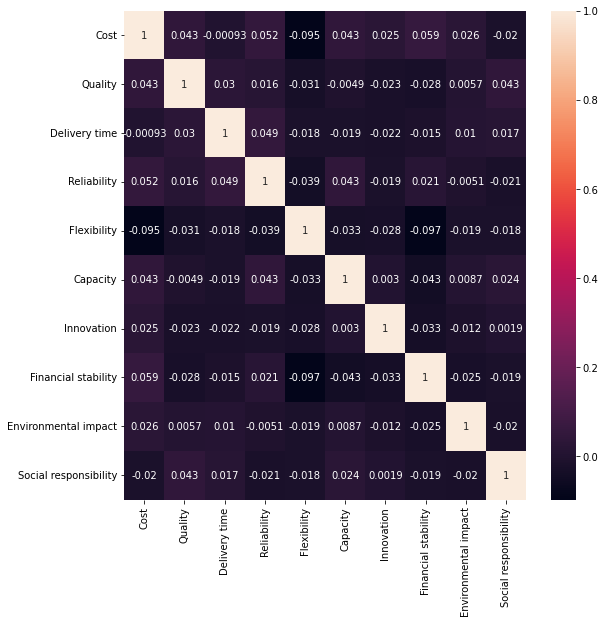

In [13]:
# Correlation matrix

plt.figure(figsize=(9,9)) 
sns.heatmap(dtf.iloc[:,1:12].corr(),yticklabels=True,annot=True)

In [14]:
#heatmap above shows hardly any significant correlation between the data columns and thus dataframe is maintained as is and no need to delete or change an existing column 

cormat = dtf.corr()
round(cormat,2)

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
Supplier ID,1.00,-0.01,0.05,0.01,0.02,-0.02,-0.01,0.02,-0.07,0.05,...,-0.01,-0.03,-0.04,-0.04,-0.01,0.00,0.06,-0.00,0.03,0.00
Cost,-0.01,1.00,0.04,-0.00,0.05,-0.09,0.04,0.03,0.06,0.03,...,-0.00,0.01,0.00,-0.02,0.02,-0.02,0.01,0.03,-0.02,0.14
Quality,0.05,0.04,1.00,0.03,0.02,-0.03,-0.00,-0.02,-0.03,0.01,...,-0.03,0.04,0.02,-0.03,0.00,-0.01,-0.04,0.05,-0.06,0.14
Delivery time,0.01,-0.00,0.03,1.00,0.05,-0.02,-0.02,-0.02,-0.01,0.01,...,-0.00,-0.01,0.01,-0.04,-0.03,-0.01,-0.01,-0.01,-0.02,0.24
Reliability,0.02,0.05,0.02,0.05,1.00,-0.04,0.04,-0.02,0.02,-0.01,...,0.03,-0.02,-0.01,-0.10,0.00,0.00,0.01,0.03,0.07,0.22
Flexibility,-0.02,-0.09,-0.03,-0.02,-0.04,1.00,-0.03,-0.03,-0.10,-0.02,...,0.06,-0.04,-0.03,-0.01,-0.01,-0.04,0.03,0.01,-0.04,0.05
Capacity,-0.01,0.04,-0.00,-0.02,0.04,-0.03,1.00,0.00,-0.04,0.01,...,0.02,-0.05,-0.02,0.05,-0.07,-0.04,-0.02,-0.03,-0.00,0.08
Innovation,0.02,0.03,-0.02,-0.02,-0.02,-0.03,0.00,1.00,-0.03,-0.01,...,0.03,0.04,0.03,-0.01,0.01,0.00,0.02,-0.00,-0.00,0.14
Financial stability,-0.07,0.06,-0.03,-0.01,0.02,-0.10,-0.04,-0.03,1.00,-0.02,...,-0.04,0.08,-0.00,-0.00,0.01,-0.01,-0.01,-0.03,-0.03,0.00
Environmental impact,0.05,0.03,0.01,0.01,-0.01,-0.02,0.01,-0.01,-0.02,1.00,...,-0.02,-0.02,0.03,-0.01,-0.00,-0.01,0.04,-0.00,0.02,0.21


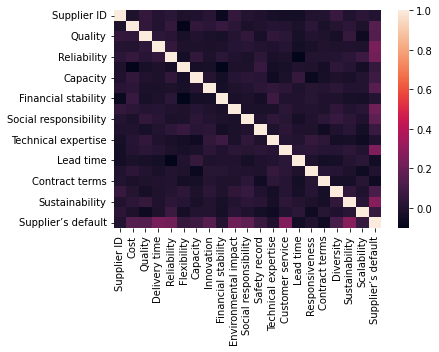

In [15]:
sns.heatmap(cormat);

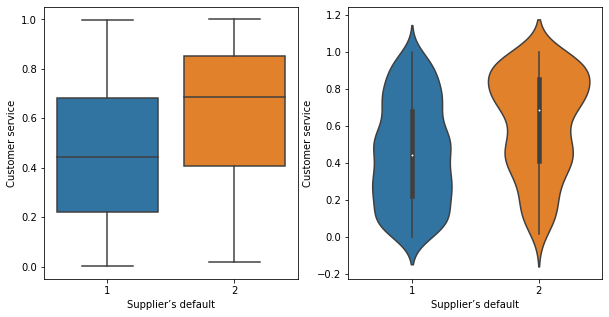

In [16]:
#above coorelation analysis shows NO individual variable having more than 0.27 correlation value with Supplier ID - hence we can say no 1 variable significantly impacts the Supplier Default.  
# However, given the data, we will drill down more into 1) Customer Service 2) Sustainabilty 3) Reliabilty

# Plotting correlation between supplier default & customer survice

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Supplier’s default", y="Customer service", data=dtf)
plt.subplot(1,2,2)
sns.violinplot(x="Supplier’s default", y="Customer service", data=dtf)
plt.show()


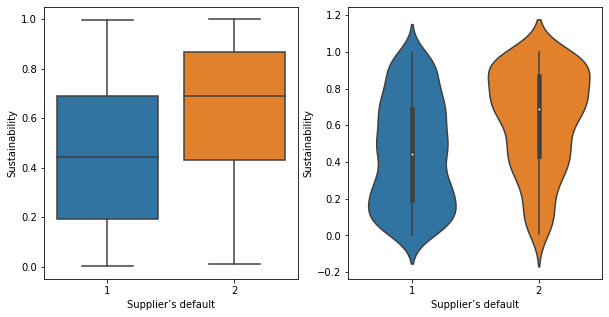

In [17]:
# Plotting correlation between supplier default & customer survice

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Supplier’s default", y="Sustainability", data=dtf)
plt.subplot(1,2,2)
sns.violinplot(x="Supplier’s default", y="Sustainability", data=dtf)
plt.show()

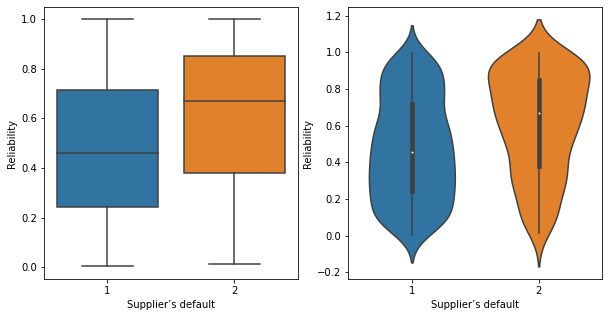

In [18]:
# Plotting correlation between supplier default & customer survice

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Supplier’s default", y="Reliability", data=dtf)
plt.subplot(1,2,2)
sns.violinplot(x="Supplier’s default", y="Reliability", data=dtf)
plt.show()

In [19]:
# Above analyis shows Supplier Default increases when these 3 reduces: Customer Service, Sustainabilty, Reliabilty



# Data Imbalance


In [20]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [21]:
X1 = dtf.drop(['Supplier’s default'], axis=1)
y1 = dtf['Supplier’s default']
supplierdefault_count = y1.value_counts()
print(supplierdefault_count)


1    728
2    272
Name: Supplier’s default, dtype: int64


<AxesSubplot:ylabel='Supplier’s default'>

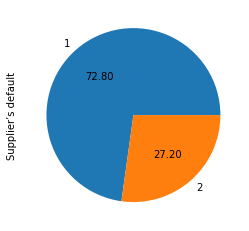

In [22]:
y1.value_counts().plot.pie(autopct='%.2f')

In [23]:
# From the output above, we can see that we have an imbalanced dataset. The active class which is the majority, the class has more data samples as compared to the inactive class which is the minority class.
#From the image above, the active class is 72.80%, while the inactive class is 27.20%. We need to balance this dataset before model training.


# One hot encoding


In [24]:
#Reputation is the only column with non-numeric data
dtf['Reputation'].value_counts()


Bad          261
Excellent    258
Average      241
Good         238
Name: Reputation, dtype: int64

In [25]:
#importing libraries
from sklearn.preprocessing import OneHotEncoder


# Converting type of columns to category
dtf['Reputation']=dtf['Reputation'].astype('category')

#Assigning numerical values and storing it in another columns
dtf['Reputation_new']=dtf['Reputation'].cat.codes

#Create an instance of One-hot-encoder
enc=OneHotEncoder()

#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(dtf[['Reputation_new']]).toarray())

#Merge with main
New_df=dtf.join(enc_data)

print(New_df)


     Supplier ID   Cost  Quality  Delivery time  Reliability  Flexibility  \
0           1001  0.874    0.758          0.082        0.114        0.082   
1           1002  0.972    0.694          0.955        0.963        0.244   
2           1003  0.827    0.413          0.199        0.577        0.127   
3           1004  0.422    0.555          0.969        0.760        0.773   
4           1005  0.767    0.958          0.915        0.719        0.715   
..           ...    ...      ...            ...          ...          ...   
995         1996  0.201    0.260          0.060        0.823        0.220   
996         1997  0.128    0.408          0.611        0.774        0.351   
997         1998  0.910    0.308          0.381        0.818        0.671   
998         1999  0.408    0.271          0.921        0.648        0.948   
999         2000  0.518    0.319          0.344        0.597        0.704   

     Capacity  Innovation Reputation  Financial stability  ...  Diversity  

# Dividing dataset into training & testing

In [26]:
New_df.head()


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new,0,1,2,3,4
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.044,0.853,0.663,1,1,0.0,0.0,1.0,0.0,0.0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.490,0.515,0.028,2,3,0.0,0.0,0.0,0.0,1.0
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.822,0.826,0.158,2,2,0.0,0.0,0.0,1.0,0.0
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.960,0.469,0.914,1,0,0.0,1.0,0.0,0.0,0.0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.004,0.013,0.575,1,1,0.0,0.0,1.0,0.0,0.0


In [27]:
dtf2 = ""


In [28]:
dtf2 = New_df
dtf2.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new,0,1,2,3,4
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.044,0.853,0.663,1,1,0.0,0.0,1.0,0.0,0.0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.490,0.515,0.028,2,3,0.0,0.0,0.0,0.0,1.0
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.822,0.826,0.158,2,2,0.0,0.0,0.0,1.0,0.0
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.960,0.469,0.914,1,0,0.0,1.0,0.0,0.0,0.0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.004,0.013,0.575,1,1,0.0,0.0,1.0,0.0,0.0


In [29]:
#In table Reputation New, chnage Bad to 10, Average to 20, Good to 30, Excellent to 40
dtf2['Reputation_new']= dtf2['Reputation_new'].replace(1, 10)
dtf2['Reputation_new']= dtf2['Reputation_new'].replace(3, 30)
dtf2['Reputation_new']= dtf2['Reputation_new'].replace(2, 40)
dtf2['Reputation_new']= dtf2['Reputation_new'].replace(0, 20)
dtf2.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new,0,1,2,3,4
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.044,0.853,0.663,1,10,0.0,0.0,1.0,0.0,0.0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.490,0.515,0.028,2,30,0.0,0.0,0.0,0.0,1.0
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.822,0.826,0.158,2,40,0.0,0.0,0.0,1.0,0.0
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.960,0.469,0.914,1,20,0.0,1.0,0.0,0.0,0.0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.004,0.013,0.575,1,10,0.0,0.0,1.0,0.0,0.0


In [30]:
#deleting last 5 columns from dataframe
dtf3 = dtf2
# Using drop() function to delete last n columns
n = 5
dtf3.drop(columns=dtf3.columns[-n:], axis=1,  inplace=True)
print(dtf3)



     Supplier ID   Cost  Quality  Delivery time  Reliability  Flexibility  \
0           1001  0.874    0.758          0.082        0.114        0.082   
1           1002  0.972    0.694          0.955        0.963        0.244   
2           1003  0.827    0.413          0.199        0.577        0.127   
3           1004  0.422    0.555          0.969        0.760        0.773   
4           1005  0.767    0.958          0.915        0.719        0.715   
..           ...    ...      ...            ...          ...          ...   
995         1996  0.201    0.260          0.060        0.823        0.220   
996         1997  0.128    0.408          0.611        0.774        0.351   
997         1998  0.910    0.308          0.381        0.818        0.671   
998         1999  0.408    0.271          0.921        0.648        0.948   
999         2000  0.518    0.319          0.344        0.597        0.704   

     Capacity  Innovation Reputation  Financial stability  ...  \
0       0

In [31]:
dtf3.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1,10
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2,30
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2,40
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1,20
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1,10


In [32]:
# delete column Reputation from data frame
dtf3.drop('Reputation', inplace=True, axis=1)
print("The DataFrame object after deleting the column Reputation")
print(dtf3)

The DataFrame object after deleting the column Reputation
     Supplier ID   Cost  Quality  Delivery time  Reliability  Flexibility  \
0           1001  0.874    0.758          0.082        0.114        0.082   
1           1002  0.972    0.694          0.955        0.963        0.244   
2           1003  0.827    0.413          0.199        0.577        0.127   
3           1004  0.422    0.555          0.969        0.760        0.773   
4           1005  0.767    0.958          0.915        0.719        0.715   
..           ...    ...      ...            ...          ...          ...   
995         1996  0.201    0.260          0.060        0.823        0.220   
996         1997  0.128    0.408          0.611        0.774        0.351   
997         1998  0.910    0.308          0.381        0.818        0.671   
998         1999  0.408    0.271          0.921        0.648        0.948   
999         2000  0.518    0.319          0.344        0.597        0.704   

     Capacity  In

In [33]:
dtf3.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.478,0.806,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1,10
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.713,0.776,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2,30
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,0.805,0.465,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2,40
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.847,0.091,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1,20
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.578,0.989,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1,10


# missing values & hot encoding

In [34]:
dtf3.head()


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.478,0.806,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1,10
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.713,0.776,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2,30
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,0.805,0.465,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2,40
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.847,0.091,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1,20
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.578,0.989,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1,10


In [35]:
dtf3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default,Reputation_new
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.478,0.806,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1,10
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.713,0.776,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2,30
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,0.805,0.465,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2,40
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.847,0.091,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1,20
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.578,0.989,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,0.201,0.260,0.060,0.823,0.220,0.745,0.614,0.804,0.543,...,0.010,0.502,0.154,0.547,0.407,0.813,0.135,0.277,1,20
996,1997,0.128,0.408,0.611,0.774,0.351,0.615,0.114,0.359,0.910,...,0.652,0.212,0.135,0.596,0.996,0.081,0.069,0.905,1,10
997,1998,0.910,0.308,0.381,0.818,0.671,0.500,0.031,0.374,0.734,...,0.401,0.677,0.072,0.744,0.520,0.748,0.069,0.403,1,20
998,1999,0.408,0.271,0.921,0.648,0.948,0.562,0.050,0.627,0.551,...,0.093,0.694,0.154,0.957,0.930,0.280,0.863,0.959,1,10


In [36]:
dtf3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,20]]

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Reputation_new,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.478,0.806,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,10,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.713,0.776,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,30,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,0.805,0.465,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,40,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.847,0.091,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,20,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.578,0.989,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,0.201,0.260,0.060,0.823,0.220,0.745,0.614,0.804,0.543,...,0.010,0.502,0.154,0.547,0.407,0.813,0.135,0.277,20,1
996,1997,0.128,0.408,0.611,0.774,0.351,0.615,0.114,0.359,0.910,...,0.652,0.212,0.135,0.596,0.996,0.081,0.069,0.905,10,1
997,1998,0.910,0.308,0.381,0.818,0.671,0.500,0.031,0.374,0.734,...,0.401,0.677,0.072,0.744,0.520,0.748,0.069,0.403,20,1
998,1999,0.408,0.271,0.921,0.648,0.948,0.562,0.050,0.627,0.551,...,0.093,0.694,0.154,0.957,0.930,0.280,0.863,0.959,10,1


In [37]:
dtf4 = dtf3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,20]]
print(dtf4)

     Supplier ID   Cost  Quality  Delivery time  Reliability  Flexibility  \
0           1001  0.874    0.758          0.082        0.114        0.082   
1           1002  0.972    0.694          0.955        0.963        0.244   
2           1003  0.827    0.413          0.199        0.577        0.127   
3           1004  0.422    0.555          0.969        0.760        0.773   
4           1005  0.767    0.958          0.915        0.719        0.715   
..           ...    ...      ...            ...          ...          ...   
995         1996  0.201    0.260          0.060        0.823        0.220   
996         1997  0.128    0.408          0.611        0.774        0.351   
997         1998  0.910    0.308          0.381        0.818        0.671   
998         1999  0.408    0.271          0.921        0.648        0.948   
999         2000  0.518    0.319          0.344        0.597        0.704   

     Capacity  Innovation  Financial stability  Environmental impact  ...  

In [38]:
dtf5 = dtf4
dtf5.dropna(inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
dtf5.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Reputation_new,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.478,0.806,...,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,10,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.713,0.776,...,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,30,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,0.805,0.465,...,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,40,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.847,0.091,...,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,20,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.578,0.989,...,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,10,1


In [40]:
dtf5.isnull().values.any()

False

In [41]:
dtf5.isnull().values.sum()

0

In [42]:
#Extracting the feature into X, 
X = dtf5.iloc[:, 1:-1].values

#Extracting the target into y
y = dtf5.iloc[:, -1].values
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.2, random_state = 0)


[[8.74e-01 7.58e-01 8.20e-02 ... 8.53e-01 6.63e-01 1.00e+01]
 [9.72e-01 6.94e-01 9.55e-01 ... 5.15e-01 2.80e-02 3.00e+01]
 [8.27e-01 4.13e-01 1.99e-01 ... 8.26e-01 1.58e-01 4.00e+01]
 ...
 [9.10e-01 3.08e-01 3.81e-01 ... 6.90e-02 4.03e-01 2.00e+01]
 [4.08e-01 2.71e-01 9.21e-01 ... 8.63e-01 9.59e-01 1.00e+01]
 [5.18e-01 3.19e-01 3.44e-01 ... 4.99e-01 5.41e-01 2.00e+01]]


# ML Algorithms

In [43]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_prediction = classifier.predict(X_test)

In [45]:
confusionmatrix = confusion_matrix(y_test, y_prediction)
print(confusionmatrix)

[[143  12]
 [ 13  30]]


In [46]:
accuracyscore = metrics.accuracy_score(y_test,y_prediction)
print(accuracyscore)

0.8737373737373737


In [47]:
#classification output
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       155
           2       0.71      0.70      0.71        43

    accuracy                           0.87       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.87      0.87      0.87       198



In [48]:
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       155
           2       0.71      0.70      0.71        43

    accuracy                           0.87       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.87      0.87      0.87       198



# ROC curves & (a) Accuracy (b) Sensitivity (c) Specificity (d) F1-score e) AUC

In [49]:
#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb



# Model 1 - Logistics Regression

[[143  12]
 [ 13  30]]
0.8737373737373737
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       155
           2       0.71      0.70      0.71        43

    accuracy                           0.87       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.87      0.87      0.87       198



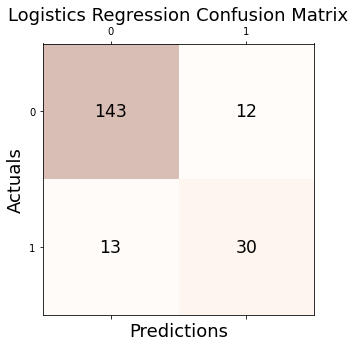

Accuracy Score = 0.8737373737373737
Precision Score = 0.9166666666666666
Recall Score = 0.9225806451612903
F1 Score = 0.9196141479099678


In [50]:
#Model 1 Logistics Regression
logisticsregressionclassifier = LogisticRegression()
logisticsregressionclassifier.fit(X_train, y_train)
y_prediction = logisticsregressionclassifier.predict(X_test)
logisticsregressionconfusionmatrix = confusion_matrix(y_test, y_prediction)
print(logisticsregressionconfusionmatrix)
logisticsregressionaccuracyscore = metrics.accuracy_score(y_test,y_prediction)
print(logisticsregressionaccuracyscore)
#classification output
print(metrics.classification_report(y_test, y_prediction))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(logisticsregressionconfusionmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(logisticsregressionconfusionmatrix.shape[0]):
    for j in range(logisticsregressionconfusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=logisticsregressionconfusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistics Regression Confusion Matrix', fontsize=18)
plt.show()

accuracylr = accuracy_score(y_test, y_prediction)
print(f"Accuracy Score = {accuracylr}")
precisionlr = precision_score(y_test, y_prediction)
print(f"Precision Score = {precisionlr}")
recalllr = recall_score(y_test, y_prediction)
print(f"Recall Score = {recalllr}")
f1scorelr = f1_score(y_test, y_prediction)
print(f"F1 Score = {f1scorelr}")





In [51]:
#fpr tpr threshold for ROC curve for logistics regression
clf_reg = LogisticRegression()
clf_reg.fit(X_train, y_train)
y_score_lr = clf_reg.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_score_lr, pos_label=1)
print(fpr_lr,tpr_lr,threshold_lr)


[0.         0.02325581 0.46511628 0.46511628 0.55813953 0.55813953
 0.58139535 0.58139535 0.60465116 0.60465116 0.69767442 0.69767442
 0.72093023 0.72093023 0.81395349 0.81395349 0.8372093  0.8372093
 0.88372093 0.88372093 0.93023256 0.93023256 0.97674419 0.97674419
 1.         1.        ] [0.         0.         0.         0.00645161 0.00645161 0.01290323
 0.01290323 0.01935484 0.01935484 0.05806452 0.05806452 0.07741935
 0.07741935 0.09032258 0.09032258 0.09677419 0.09677419 0.10967742
 0.10967742 0.1483871  0.1483871  0.15483871 0.15483871 0.20645161
 0.20645161 1.        ] [1.99375117e+00 9.93751169e-01 8.01518474e-01 7.93818260e-01
 7.18671308e-01 6.89053356e-01 6.83960346e-01 6.83231983e-01
 6.80463445e-01 6.36944920e-01 5.81545513e-01 5.18089703e-01
 4.82584416e-01 4.75711100e-01 4.56210118e-01 4.38351938e-01
 4.25429059e-01 3.97768896e-01 3.84829469e-01 3.47204483e-01
 3.32964767e-01 3.31545854e-01 3.09296071e-01 2.41582329e-01
 2.35467520e-01 2.67990681e-04]


# Model 2 - Random Forest Classifier

[[152   3]
 [ 24  19]]
0.8636363636363636
              precision    recall  f1-score   support

           1       0.86      0.98      0.92       155
           2       0.86      0.44      0.58        43

    accuracy                           0.86       198
   macro avg       0.86      0.71      0.75       198
weighted avg       0.86      0.86      0.85       198



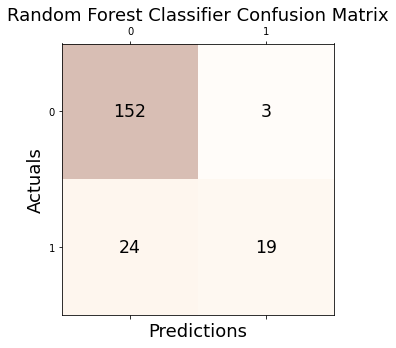

Accuracy Score = 0.8737373737373737
Precision Score = 0.9166666666666666
Recall Score = 0.9225806451612903
F1 Score = 0.9196141479099678


In [52]:
#Model 2 - random forest classfier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_prediction_rfc = rfc.predict(X_test)
rfcconfusionmatrix = confusion_matrix(y_test, y_prediction_rfc)
print(rfcconfusionmatrix)
rfcaccuracyscore = metrics.accuracy_score(y_test,y_prediction_rfc)
print(rfcaccuracyscore)
#classification output
print(metrics.classification_report(y_test, y_prediction_rfc))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(rfcconfusionmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(rfcconfusionmatrix.shape[0]):
    for j in range(rfcconfusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=rfcconfusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

accuracyrfc = accuracy_score(y_test, y_prediction)
print(f"Accuracy Score = {accuracyrfc}")
precisionrfc = precision_score(y_test, y_prediction)
print(f"Precision Score = {precisionrfc}")
recallrfc = recall_score(y_test, y_prediction)
print(f"Recall Score = {recallrfc}")
f1scorerfc = f1_score(y_test, y_prediction)
print(f"F1 Score = {f1scorerfc}")

In [53]:
#fpr tpr threshold for ROC curve for Random Forest Classifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)
y_score_rfc = clf_rfc.predict_proba(X_test)[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_score_rfc, pos_label=1)
print(fpr_rfc,tpr_rfc,threshold_rfc)


[0.         0.04651163 0.09302326 0.18604651 0.23255814 0.27906977
 0.3255814  0.41860465 0.44186047 0.48837209 0.48837209 0.51162791
 0.53488372 0.53488372 0.60465116 0.62790698 0.6744186  0.69767442
 0.72093023 0.74418605 0.74418605 0.76744186 0.76744186 0.76744186
 0.76744186 0.79069767 0.81395349 0.8372093  0.86046512 0.90697674
 0.97674419 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ] [0.         0.         0.         0.         0.         0.
 0.         0.01290323 0.01935484 0.01935484 0.02580645 0.03870968
 0.04516129 0.0516129  0.07096774 0.07096774 0.07741935 0.09032258
 0.09677419 0.10967742 0.12258065 0.12258065 0.13548387 0.16129032
 0.16774194 0.18709677 0.2        0.21935484 0.24516129 0.28387097
 0.29677419 0.33548387 0.35483871 0.4        0.43870968 0.46451613
 0.47741935 0.5483871 

# Model 3: Decision Tree Classifier

[[127  28]
 [ 17  26]]
0.7727272727272727
              precision    recall  f1-score   support

           1       0.88      0.82      0.85       155
           2       0.48      0.60      0.54        43

    accuracy                           0.77       198
   macro avg       0.68      0.71      0.69       198
weighted avg       0.79      0.77      0.78       198



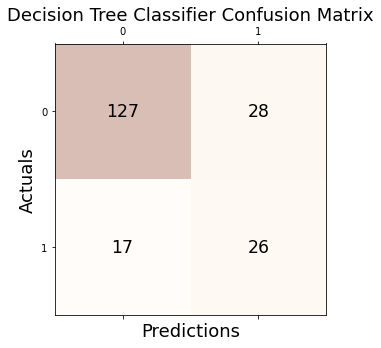

Accuracy Score = 0.8737373737373737
Precision Score = 0.9166666666666666
Recall Score = 0.9225806451612903
F1 Score = 0.9196141479099678


In [54]:
#Model 3: Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_prediction_dtc = dtc.predict(X_test)
dtcconfusionmatrix = confusion_matrix(y_test, y_prediction_dtc)
print(dtcconfusionmatrix)
dtcaccuracyscore = metrics.accuracy_score(y_test,y_prediction_dtc)
print(dtcaccuracyscore)
#classification output
print(metrics.classification_report(y_test, y_prediction_dtc))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(dtcconfusionmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(dtcconfusionmatrix.shape[0]):
    for j in range(dtcconfusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=dtcconfusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=18)
plt.show()

accuracydtc = accuracy_score(y_test, y_prediction)
print(f"Accuracy Score = {accuracydtc}")
precisiondtc = precision_score(y_test, y_prediction)
print(f"Precision Score = {precisiondtc}")
recalldtc = recall_score(y_test, y_prediction)
print(f"Recall Score = {recalldtc}")
f1scoredtc = f1_score(y_test, y_prediction)
print(f"F1 Score = {f1scoredtc}")

In [55]:
#fpr tpr threshold for ROC curve for Decision Tree Classifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)
y_score_dtc = clf_dtc.predict_proba(X_test)[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, y_score_dtc, pos_label=1)
print(fpr_dtc,tpr_dtc,threshold_dtc)

[0.         0.65116279 1.        ] [0.         0.19354839 1.        ] [2. 1. 0.]


# Model 4: Gaussian Naive Bayes Classifier

[[145  10]
 [ 17  26]]
0.8636363636363636
              precision    recall  f1-score   support

           1       0.90      0.94      0.91       155
           2       0.72      0.60      0.66        43

    accuracy                           0.86       198
   macro avg       0.81      0.77      0.79       198
weighted avg       0.86      0.86      0.86       198



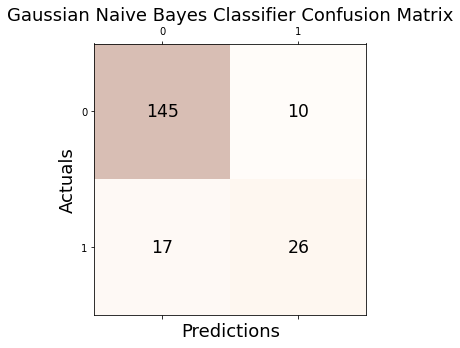

Accuracy Score = 0.8737373737373737
Precision Score = 0.9166666666666666
Recall Score = 0.9225806451612903
F1 Score = 0.9196141479099678


In [56]:
#Model 4: Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)
gnbconfusionmatrix = confusion_matrix(y_test, y_prediction_gnb)
print(gnbconfusionmatrix)
gnbaccuracyscore = metrics.accuracy_score(y_test,y_prediction_gnb)
print(gnbaccuracyscore)
#classification output
print(metrics.classification_report(y_test, y_prediction_gnb))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(gnbconfusionmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(gnbconfusionmatrix.shape[0]):
    for j in range(gnbconfusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=gnbconfusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Gaussian Naive Bayes Classifier Confusion Matrix', fontsize=18)
plt.show()

accuracygnb = accuracy_score(y_test, y_prediction)
print(f"Accuracy Score = {accuracygnb}")
precisiongnb = precision_score(y_test, y_prediction)
print(f"Precision Score = {precisiongnb}")
recallgnb = recall_score(y_test, y_prediction)
print(f"Recall Score = {recallgnb}")
f1scoregnb = f1_score(y_test, y_prediction)
print(f"F1 Score = {f1scoregnb}")

In [57]:
#fpr tpr threshold for ROC curve for Gaussian Naive Bayes Classifier
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_score_gnb = clf_gnb.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_test, y_score_gnb, pos_label=1)
print(fpr_gnb,tpr_gnb,threshold_gnb)

[0.         0.02325581 0.48837209 0.48837209 0.51162791 0.51162791
 0.53488372 0.53488372 0.55813953 0.55813953 0.58139535 0.58139535
 0.62790698 0.62790698 0.65116279 0.65116279 0.81395349 0.81395349
 0.8372093  0.8372093  0.86046512 0.86046512 0.90697674 0.90697674
 0.93023256 0.93023256 0.95348837 0.95348837 0.97674419 0.97674419
 1.         1.        ] [0.         0.         0.         0.01290323 0.01290323 0.01935484
 0.01935484 0.0516129  0.0516129  0.05806452 0.05806452 0.06451613
 0.06451613 0.09032258 0.09032258 0.09677419 0.09677419 0.11612903
 0.11612903 0.12903226 0.12903226 0.1483871  0.1483871  0.16129032
 0.16129032 0.20645161 0.20645161 0.21935484 0.21935484 0.38064516
 0.38064516 1.        ] [1.96981581e+00 9.69815811e-01 6.79781300e-01 6.42076498e-01
 6.35427172e-01 6.25275054e-01 6.10528416e-01 5.44370398e-01
 5.29108551e-01 5.23249513e-01 5.23108944e-01 5.13003312e-01
 4.90945991e-01 4.31834054e-01 4.28488503e-01 4.24367856e-01
 3.66112249e-01 3.51253830e-01 3.50585

# Model 5: Gradient Boosting Classifier

[[147   8]
 [ 15  28]]
0.8838383838383839
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       155
           2       0.78      0.65      0.71        43

    accuracy                           0.88       198
   macro avg       0.84      0.80      0.82       198
weighted avg       0.88      0.88      0.88       198



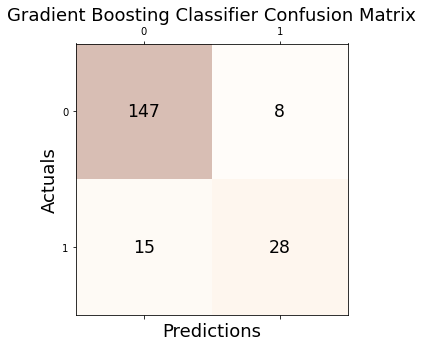

Accuracy Score = 0.8737373737373737
Precision Score = 0.9166666666666666
Recall Score = 0.9225806451612903
F1 Score = 0.9196141479099678


In [58]:
#Model 5: Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_prediction_gbc = gbc.predict(X_test)
gbcconfusionmatrix = confusion_matrix(y_test, y_prediction_gbc)
print(gbcconfusionmatrix)
gbcaccuracyscore = metrics.accuracy_score(y_test,y_prediction_gbc)
print(gbcaccuracyscore)
#classification output
print(metrics.classification_report(y_test, y_prediction_gbc))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(gbcconfusionmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(gbcconfusionmatrix.shape[0]):
    for j in range(gbcconfusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=gbcconfusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Gradient Boosting Classifier Confusion Matrix', fontsize=18)
plt.show()

accuracygbc = accuracy_score(y_test, y_prediction)
print(f"Accuracy Score = {accuracygbc}")
precisiongbc = precision_score(y_test, y_prediction)
print(f"Precision Score = {precisiongbc}")
recallgbc = recall_score(y_test, y_prediction)
print(f"Recall Score = {recallgbc}")
f1scoregbc = f1_score(y_test, y_prediction)
print(f"F1 Score = {f1scoregbc}")

In [59]:
#fpr tpr threshold for ROC curve for Gradient Boosting Classifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
y_score_gbc = clf_gbc.predict_proba(X_test)[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, y_score_gbc, pos_label=1)
print(fpr_gbc,tpr_gbc,threshold_gbc)

[0.         0.02325581 0.39534884 0.39534884 0.51162791 0.51162791
 0.53488372 0.53488372 0.58139535 0.58139535 0.60465116 0.60465116
 0.65116279 0.65116279 0.72093023 0.72093023 0.74418605 0.74418605
 0.79069767 0.79069767 0.81395349 0.81395349 0.88372093 0.88372093
 0.90697674 0.90697674 0.95348837 0.95348837 0.97674419 0.97674419
 1.         1.        ] [0.         0.         0.         0.00645161 0.00645161 0.01290323
 0.01290323 0.03225806 0.03225806 0.03870968 0.03870968 0.0516129
 0.0516129  0.07096774 0.07096774 0.07741935 0.07741935 0.10322581
 0.10322581 0.12258065 0.12258065 0.12903226 0.12903226 0.1483871
 0.1483871  0.16774194 0.16774194 0.24516129 0.24516129 0.41935484
 0.41935484 1.        ] [1.99306080e+00 9.93060802e-01 8.16587957e-01 8.00828356e-01
 7.11495879e-01 7.00658626e-01 6.87577125e-01 6.46919326e-01
 6.19297254e-01 6.06437085e-01 6.05380810e-01 5.32534506e-01
 5.31383336e-01 4.32413079e-01 3.85082232e-01 3.83863383e-01
 3.59273582e-01 3.28674110e-01 3.1460356

# Classifier Model Comparison and Analysis

In [60]:
# Classifier Model Comparison and Analysis
classifier_names =['Logistic Regression','Random Forest','Decision Tree','Gaussian Naive Bayes','Gradient Boosting']
accuracy_scores = [accuracylr, accuracyrfc, accuracydtc, accuracygnb, accuracygbc] 
precision_scores = [precisionlr, precisionrfc, precisiondtc, precisiongnb, precisiongbc] 
recall_scores = [recalllr, recallrfc, recalldtc, recallgnb, recallgbc] 
f1score_scores = [f1scorelr, f1scorerfc, f1scoredtc, f1scoregnb, f1scoregbc] 
print(classifier_names)
print(accuracy_scores)
print(precision_scores)
print(recall_scores)
print(f1score_scores)

['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gaussian Naive Bayes', 'Gradient Boosting']
[0.8737373737373737, 0.8737373737373737, 0.8737373737373737, 0.8737373737373737, 0.8737373737373737]
[0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666]
[0.9225806451612903, 0.9225806451612903, 0.9225806451612903, 0.9225806451612903, 0.9225806451612903]
[0.9196141479099678, 0.9196141479099678, 0.9196141479099678, 0.9196141479099678, 0.9196141479099678]


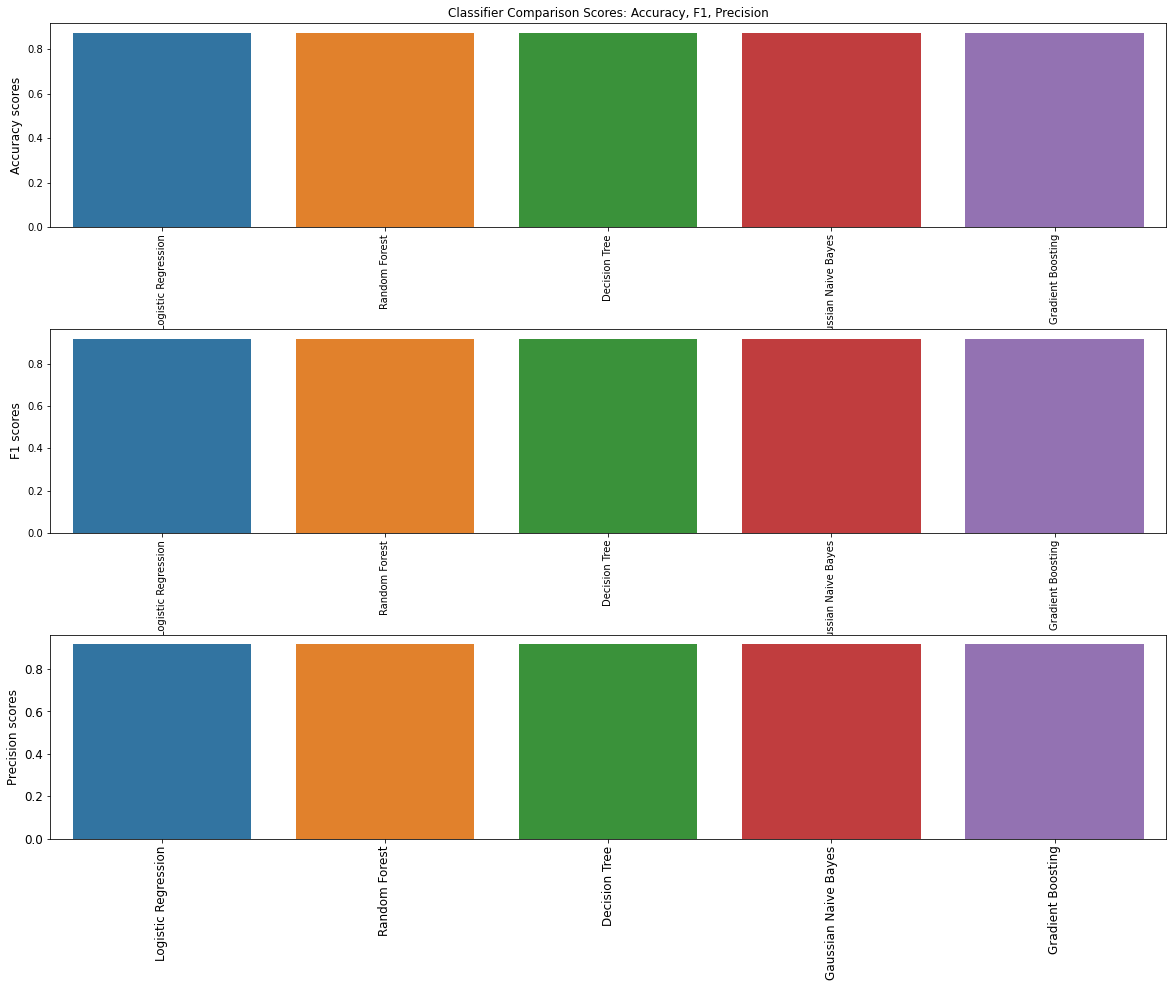

In [61]:
sns.set_color_codes("colorblind")
    
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, Precision')
s1 = sns.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x = classifier_names, y=f1score_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = classifier_names, y=precision_scores)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('Precision scores', fontsize=12)
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

Text(0, 0.5, 'True Positive Rate')

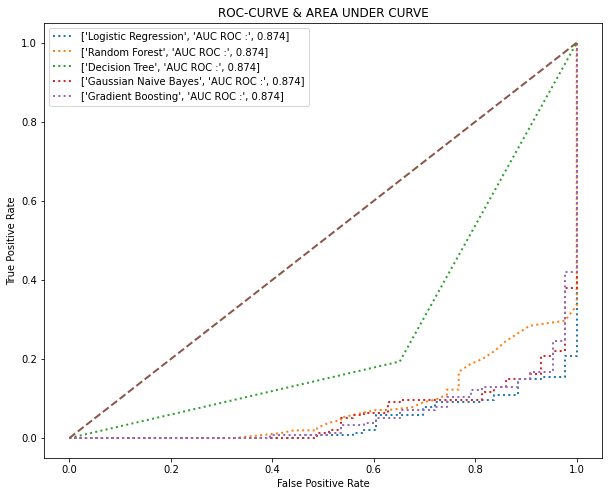

In [62]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
ax.plot(fpr_lr,tpr_lr,label = [classifier_names[0], "AUC ROC :", round(accuracylr,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(accuracyrfc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dtc,tpr_dtc,label = [classifier_names[2], "AUC ROC :", round(accuracydtc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gnb,tpr_gnb,label = [classifier_names[3], "AUC ROC :", round(accuracygnb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gbc,tpr_gbc,label = [classifier_names[4], "AUC ROC :", round(accuracygbc,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Working with new supplier dataset

In [63]:
sgdtf =""
sgdtf

''

In [64]:
#importing new supplier dataset
url1 = 'https://raw.githubusercontent.com/sourajitaghosh/DataScienceSupplierRiskPrediction/main/New_supplier_data.csv'
sgdtf = pd.read_csv(url1)
# Dataset is now stored in a Pandas Dataframe
sgdtf


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,Average,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,Bad,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,Good,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,Average,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,Bad,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [65]:
sgdtf1=""
sgdtf2=""
sgdtf3=""
sgdtf


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,Average,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,Bad,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,Good,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,Average,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,Bad,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [66]:
sgdtf1 = sgdtf

In [67]:
#In table Reputation New, chnage Bad to 10, Average to 20, Good to 30, Excellent to 40
sgdtf1['Reputation']= sgdtf1['Reputation'].replace('Bad', 10)
sgdtf1['Reputation']= sgdtf1['Reputation'].replace('Average', 20)
sgdtf1['Reputation']= sgdtf1['Reputation'].replace('Good', 30)
sgdtf1.head()


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [68]:
sgdtf1


,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [69]:
sgdtf2 = sgdtf1
sgdtf2 = sgdtf2.rename(columns={'Reputation': 'Reputation_new'})
sgdtf2

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation_new,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [70]:
sgdtf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            5 non-null      object 
 1   Cost                   5 non-null      float64
 2   Quality                5 non-null      float64
 3   Delivery time          5 non-null      float64
 4   Reliability            5 non-null      float64
 5   Flexibility            5 non-null      float64
 6   Capacity               5 non-null      float64
 7   Innovation             5 non-null      float64
 8   Reputation_new         5 non-null      int64  
 9   Financial stability    5 non-null      float64
 10  Environmental impact   5 non-null      float64
 11  Social responsibility  5 non-null      float64
 12  Safety record          5 non-null      float64
 13  Technical expertise    5 non-null      float64
 14  Customer service       5 non-null      float64
 15  Lead time 

In [71]:
sgdtf2 = sgdtf2.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,8]]
sgdtf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            5 non-null      object 
 1   Cost                   5 non-null      float64
 2   Quality                5 non-null      float64
 3   Delivery time          5 non-null      float64
 4   Reliability            5 non-null      float64
 5   Flexibility            5 non-null      float64
 6   Capacity               5 non-null      float64
 7   Innovation             5 non-null      float64
 8   Financial stability    5 non-null      float64
 9   Environmental impact   5 non-null      float64
 10  Social responsibility  5 non-null      float64
 11  Safety record          5 non-null      float64
 12  Technical expertise    5 non-null      float64
 13  Customer service       5 non-null      float64
 14  Lead time              5 non-null      float64
 15  Responsive

In [72]:
sgdtf2 = sgdtf2.iloc[:,[0,1,2,3,4,5,6,7,20,8,9,10,11,12,13,14,15,16,17,18,19]]
sgdtf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            5 non-null      object 
 1   Cost                   5 non-null      float64
 2   Quality                5 non-null      float64
 3   Delivery time          5 non-null      float64
 4   Reliability            5 non-null      float64
 5   Flexibility            5 non-null      float64
 6   Capacity               5 non-null      float64
 7   Innovation             5 non-null      float64
 8   Reputation_new         5 non-null      int64  
 9   Financial stability    5 non-null      float64
 10  Environmental impact   5 non-null      float64
 11  Social responsibility  5 non-null      float64
 12  Safety record          5 non-null      float64
 13  Technical expertise    5 non-null      float64
 14  Customer service       5 non-null      float64
 15  Lead time 

In [73]:
sgdtf2.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation_new,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [74]:
sgdtf3=sgdtf2
sgdtf3

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation_new,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [75]:
del sgdtf3["Supplier ID"]

In [76]:
sgdtf3

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation_new,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,0.671,0.554,0.455,0.366,0.952,0.756,0.239,20,0.777,0.709,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,0.674,0.393,0.688,0.507,0.693,0.469,0.338,10,0.619,0.388,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,0.788,0.572,0.845,0.148,0.426,0.879,0.364,30,0.841,0.643,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,0.848,0.368,0.481,0.773,0.172,0.206,0.154,20,0.763,0.744,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,0.260,0.795,0.957,0.879,0.061,0.778,0.900,10,0.863,0.902,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [77]:
sgdtf3_supplierrisk_prob_1 = classifier.predict_proba(sgdtf3)
sgdtf3_supplierrisk_prob_1

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0.24002002, 0.75997998],
       [0.82555216, 0.17444784],
       [0.03640958, 0.96359042],
       [0.37072116, 0.62927884],
       [0.02615246, 0.97384754]])

In [78]:
sgdtf3_supplierdefault_prob = sgdtf3_supplierrisk_prob_1[:, 1]
sgdtf3_supplierdefault_prob

array([0.75997998, 0.17444784, 0.96359042, 0.62927884, 0.97384754])

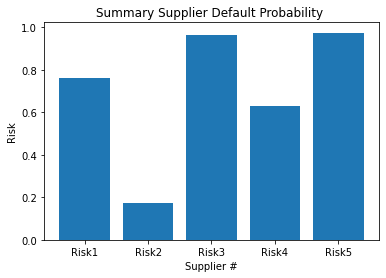

In [79]:
import matplotlib.pyplot as plt

x_axis = ['Risk1', 'Risk2', 'Risk3', 'Risk4', 'Risk5']
y_axis = [sgdtf3_supplierdefault_prob[0], sgdtf3_supplierdefault_prob[1], sgdtf3_supplierdefault_prob[2], sgdtf3_supplierdefault_prob[3], sgdtf3_supplierdefault_prob[4] ]

plt.bar(x_axis, y_axis)
plt.title('Summary Supplier Default Probability ')
plt.xlabel('Supplier #')
plt.ylabel('Risk')
plt.show()

# Linear programming on new supplier


In [80]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 31.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.0 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.22.0 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.22.0 which is incompatible.


In [81]:
from ortools.linear_solver import pywraplp
import numpy as np
#storing data
discounts = [
    [7, 22, 25, 34, 35],
    [30, 18, 18, 31, 26],
    [21, 30, 34, 12, 14],
    [27, 29, 30, 60, 6],
    [31, 25, 10, 13, 30],
    [23, 32, 15, 60, 9],
    [6, 21, 18, 60, 28],
    [17, 18, 6, 8, 31]
]


demand = [592, 446, 548, 647, 245, 797, 603, 401]
listprice = [870, 630, 960, 400, 980, 510, 830, 550]
fixedadmincost = 50000
reliability = 0.8
numproduct = len(discounts)
numsupplier = len(discounts[1])

discountedprice = np.zeros(40).reshape(numproduct,numsupplier)
for i in range(numproduct):
  for j in range(numsupplier):
     discountedprice[i][j] = (1-(discounts[i][j])/100) * listprice[i]

print(discountedprice)

#Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

[[809.1 678.6 652.5 574.2 565.5]
 [441.  516.6 516.6 434.7 466.2]
 [758.4 672.  633.6 844.8 825.6]
 [292.  284.  280.  160.  376. ]
 [676.2 735.  882.  852.6 686. ]
 [392.7 346.8 433.5 204.  464.1]
 [780.2 655.7 680.6 332.  597.6]
 [456.5 451.  517.  506.  379.5]]


# Solver

In [82]:
#Decision variables 
infinity = solver.infinity()

y = {} #binary decision variable
for j in range(numsupplier):
    y[j] = solver.IntVar(0, 1, 'y[%i]' % (j+1))
print(y)

x_var = {} #Decision variable for the quantity of ith Product from jth Supplier 
k = 0
for i in range(numproduct):
  x_var[i] = [solver.NumVar(0, infinity, 'X[%d][%d]' %((i+1),(j+1))) for j in range(numsupplier)]
 # k=k+1

print(x_var)
print(type(x_var))

import pandas as pd
pd_sg_frame = pd.DataFrame.from_dict(x_var)
print(pd_sg_frame.transpose())

print('Number of variables =', solver.NumVariables())

{0: y[1], 1: y[2], 2: y[3], 3: y[4], 4: y[5]}
{0: [X[1][1], X[1][2], X[1][3], X[1][4], X[1][5]], 1: [X[2][1], X[2][2], X[2][3], X[2][4], X[2][5]], 2: [X[3][1], X[3][2], X[3][3], X[3][4], X[3][5]], 3: [X[4][1], X[4][2], X[4][3], X[4][4], X[4][5]], 4: [X[5][1], X[5][2], X[5][3], X[5][4], X[5][5]], 5: [X[6][1], X[6][2], X[6][3], X[6][4], X[6][5]], 6: [X[7][1], X[7][2], X[7][3], X[7][4], X[7][5]], 7: [X[8][1], X[8][2], X[8][3], X[8][4], X[8][5]]}
<class 'dict'>
         0        1        2        3        4
0  X[1][1]  X[1][2]  X[1][3]  X[1][4]  X[1][5]
1  X[2][1]  X[2][2]  X[2][3]  X[2][4]  X[2][5]
2  X[3][1]  X[3][2]  X[3][3]  X[3][4]  X[3][5]
3  X[4][1]  X[4][2]  X[4][3]  X[4][4]  X[4][5]
4  X[5][1]  X[5][2]  X[5][3]  X[5][4]  X[5][5]
5  X[6][1]  X[6][2]  X[6][3]  X[6][4]  X[6][5]
6  X[7][1]  X[7][2]  X[7][3]  X[7][4]  X[7][5]
7  X[8][1]  X[8][2]  X[8][3]  X[8][4]  X[8][5]
Number of variables = 45


In [83]:
#constraints

# reliability constraints
for i in range(numproduct):
  for j in range(numsupplier):
    solver.Add(x_var[i][j] <= reliability*demand[i]*y[j])
    print(x_var[i][j])
    print(demand[i])
    print(y[j])

#demand satisfaction constraints
for i in range(numproduct):
  expr = [x_var[i][j] for j in range(numsupplier)]
  solver.Add(sum(expr) >= demand[i])
  print(expr)
  print(sum(expr))
  print(demand[i])

print('Number of constraints =', solver.NumConstraints())



X[1][1]
592
y[1]
X[1][2]
592
y[2]
X[1][3]
592
y[3]
X[1][4]
592
y[4]
X[1][5]
592
y[5]
X[2][1]
446
y[1]
X[2][2]
446
y[2]
X[2][3]
446
y[3]
X[2][4]
446
y[4]
X[2][5]
446
y[5]
X[3][1]
548
y[1]
X[3][2]
548
y[2]
X[3][3]
548
y[3]
X[3][4]
548
y[4]
X[3][5]
548
y[5]
X[4][1]
647
y[1]
X[4][2]
647
y[2]
X[4][3]
647
y[3]
X[4][4]
647
y[4]
X[4][5]
647
y[5]
X[5][1]
245
y[1]
X[5][2]
245
y[2]
X[5][3]
245
y[3]
X[5][4]
245
y[4]
X[5][5]
245
y[5]
X[6][1]
797
y[1]
X[6][2]
797
y[2]
X[6][3]
797
y[3]
X[6][4]
797
y[4]
X[6][5]
797
y[5]
X[7][1]
603
y[1]
X[7][2]
603
y[2]
X[7][3]
603
y[3]
X[7][4]
603
y[4]
X[7][5]
603
y[5]
X[8][1]
401
y[1]
X[8][2]
401
y[2]
X[8][3]
401
y[3]
X[8][4]
401
y[4]
X[8][5]
401
y[5]
[X[1][1], X[1][2], X[1][3], X[1][4], X[1][5]]
(((((<ortools.linear_solver.linear_solver_natural_api.VariableExpr object at 0x7ff1dfadcd60> + 0) + X[1][2]) + X[1][3]) + X[1][4]) + X[1][5])
592
[X[2][1], X[2][2], X[2][3], X[2][4], X[2][5]]
(((((<ortools.linear_solver.linear_solver_natural_api.VariableExpr object at 0x7ff

# Foundation Objective function - Linear Programming

In [84]:
supplier_objective_terms = []
for i in range(numproduct):
    for j in range(numsupplier):
        supplier_objective_terms.append((1-(discounts[i][j])/100) * listprice[i] * x_var[i][j])

for j in range(numsupplier):
    supplier_objective_terms.append(fixedadmincost  * y[j])


solver.Minimize(solver.Sum(supplier_objective_terms))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Minimum Cost for satisfying demand = ', solver.Objective().Value())
  MinCost_WithoutSupplierRiskProbability = solver.Objective().Value()
  print()
  for j in range(numsupplier):
    print(y[j] , ' = ', y[j].solution_value())
  for i in range(numproduct):
    print()
    for j in range(numsupplier):
      if(round(x_var[i][j].solution_value(),2) == -0.0):
        print(x_var[i][j], " = ", 0.0 , "| ",end=" ")
      else:
        print(x_var[i][j], " = ", round(x_var[i][j].solution_value(),2), "| ",end=" ")  

else:
        print('No optimal solution available')

Minimum Cost for satisfying demand =  1933110.7200000002

y[1]  =  0.0
y[2]  =  1.0
y[3]  =  -0.0
y[4]  =  1.0
y[5]  =  1.0

X[1][1]  =  0.0 |  X[1][2]  =  0.0 |  X[1][3]  =  0.0 |  X[1][4]  =  118.4 |  X[1][5]  =  473.6 |  
X[2][1]  =  0.0 |  X[2][2]  =  0.0 |  X[2][3]  =  0.0 |  X[2][4]  =  356.8 |  X[2][5]  =  89.2 |  
X[3][1]  =  0.0 |  X[3][2]  =  438.4 |  X[3][3]  =  0.0 |  X[3][4]  =  0.0 |  X[3][5]  =  109.6 |  
X[4][1]  =  0.0 |  X[4][2]  =  129.4 |  X[4][3]  =  0.0 |  X[4][4]  =  517.6 |  X[4][5]  =  0.0 |  
X[5][1]  =  0.0 |  X[5][2]  =  49.0 |  X[5][3]  =  0.0 |  X[5][4]  =  0.0 |  X[5][5]  =  196.0 |  
X[6][1]  =  0.0 |  X[6][2]  =  159.4 |  X[6][3]  =  0.0 |  X[6][4]  =  637.6 |  X[6][5]  =  0.0 |  
X[7][1]  =  0.0 |  X[7][2]  =  0.0 |  X[7][3]  =  0.0 |  X[7][4]  =  482.4 |  X[7][5]  =  120.6 |  
X[8][1]  =  0.0 |  X[8][2]  =  80.2 |  X[8][3]  =  0.0 |  X[8][4]  =  0.0 |  X[8][5]  =  320.8 |  

# Sensitivity Analysis: Objective function with supplier risk + Cost=80000

In [85]:
riskscalecostrate =80000
supplier_objective_terms_2 = []
for i in range(numproduct):
    for j in range(numsupplier):
        supplier_objective_terms.append((1-(discounts[i][j])/100) * listprice[i] * x_var[i][j])

for j in range(numsupplier):
    supplier_objective_terms_2.append((fixedadmincost  * y[j])+ (riskscalecostrate * y[j] * sgdtf3_supplierdefault_prob[j]))


solver.Minimize(solver.Sum(supplier_objective_terms_2))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Minimum Cost for satisfying demand = ', solver.Objective().Value())
  MinCost_WithSupplierRisk_CostSensitivity80000 = solver.Objective().Value()
  print()
  for j in range(numsupplier):
    print(y[j] , ' = ', y[j].solution_value())
  for i in range(numproduct):
    print()
    for j in range(numsupplier):
      if(round(x_var[i][j].solution_value(),2) == -0.0):
        print(x_var[i][j], " = ", 0.0 , "| ",end=" ")
      else:
        print(x_var[i][j], " = ", round(x_var[i][j].solution_value(),2), "| ",end=" ")  

else:
        print('No optimal solution available')

Minimum Cost for satisfying demand =  164298.13462803524

y[1]  =  -0.0
y[2]  =  1.0
y[3]  =  0.0
y[4]  =  1.0
y[5]  =  0.0

X[1][1]  =  0.0 |  X[1][2]  =  355.2 |  X[1][3]  =  0.0 |  X[1][4]  =  236.8 |  X[1][5]  =  0.0 |  
X[2][1]  =  0.0 |  X[2][2]  =  267.6 |  X[2][3]  =  0.0 |  X[2][4]  =  178.4 |  X[2][5]  =  0.0 |  
X[3][1]  =  0.0 |  X[3][2]  =  328.8 |  X[3][3]  =  0.0 |  X[3][4]  =  219.2 |  X[3][5]  =  0.0 |  
X[4][1]  =  0.0 |  X[4][2]  =  388.2 |  X[4][3]  =  0.0 |  X[4][4]  =  258.8 |  X[4][5]  =  0.0 |  
X[5][1]  =  0.0 |  X[5][2]  =  147.0 |  X[5][3]  =  0.0 |  X[5][4]  =  98.0 |  X[5][5]  =  0.0 |  
X[6][1]  =  0.0 |  X[6][2]  =  478.2 |  X[6][3]  =  0.0 |  X[6][4]  =  318.8 |  X[6][5]  =  0.0 |  
X[7][1]  =  0.0 |  X[7][2]  =  361.8 |  X[7][3]  =  0.0 |  X[7][4]  =  241.2 |  X[7][5]  =  0.0 |  
X[8][1]  =  0.0 |  X[8][2]  =  240.6 |  X[8][3]  =  0.0 |  X[8][4]  =  160.4 |  X[8][5]  =  0.0 |  

# Sensitivity Analysis: Objective function with supplier risk + Cost=60000

In [86]:
riskscalecostrate =60000
supplier_objective_terms_2 = []
for i in range(numproduct):
    for j in range(numsupplier):
        supplier_objective_terms.append((1-(discounts[i][j])/100) * listprice[i] * x_var[i][j])

for j in range(numsupplier):
    supplier_objective_terms_2.append((fixedadmincost  * y[j])+ (riskscalecostrate * y[j] * sgdtf3_supplierdefault_prob[j]))


solver.Minimize(solver.Sum(supplier_objective_terms_2))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Minimum Cost for satisfying demand = ', solver.Objective().Value())
  MinCost_WithSupplierRisk_CostSensitivity60000 = solver.Objective().Value()
  print()
  for j in range(numsupplier):
    print(y[j] , ' = ', y[j].solution_value())
  for i in range(numproduct):
    print()
    for j in range(numsupplier):
      if(round(x_var[i][j].solution_value(),2) == -0.0):
        print(x_var[i][j], " = ", 0.0 , "| ",end=" ")
      else:
        print(x_var[i][j], " = ", round(x_var[i][j].solution_value(),2), "| ",end=" ")  

else:
        print('No optimal solution available')

Minimum Cost for satisfying demand =  148223.6009710265

y[1]  =  0.0
y[2]  =  1.0
y[3]  =  0.0
y[4]  =  1.0
y[5]  =  0.0

X[1][1]  =  0.0 |  X[1][2]  =  236.55 |  X[1][3]  =  0.0 |  X[1][4]  =  355.45 |  X[1][5]  =  0.0 |  
X[2][1]  =  0.0 |  X[2][2]  =  178.21 |  X[2][3]  =  0.0 |  X[2][4]  =  267.79 |  X[2][5]  =  0.0 |  
X[3][1]  =  0.0 |  X[3][2]  =  218.97 |  X[3][3]  =  0.0 |  X[3][4]  =  329.03 |  X[3][5]  =  0.0 |  
X[4][1]  =  0.0 |  X[4][2]  =  258.53 |  X[4][3]  =  0.0 |  X[4][4]  =  388.47 |  X[4][5]  =  0.0 |  
X[5][1]  =  0.0 |  X[5][2]  =  97.9 |  X[5][3]  =  0.0 |  X[5][4]  =  147.1 |  X[5][5]  =  0.0 |  
X[6][1]  =  0.0 |  X[6][2]  =  318.47 |  X[6][3]  =  0.0 |  X[6][4]  =  478.53 |  X[6][5]  =  0.0 |  
X[7][1]  =  0.0 |  X[7][2]  =  240.95 |  X[7][3]  =  0.0 |  X[7][4]  =  362.05 |  X[7][5]  =  0.0 |  
X[8][1]  =  0.0 |  X[8][2]  =  160.23 |  X[8][3]  =  0.0 |  X[8][4]  =  240.77 |  X[8][5]  =  0.0 |  

# Sensitivity Analysis: Objective function with supplier risk + Cost=90000

In [87]:
riskscalecostrate =90000
supplier_objective_terms_2 = []
for i in range(numproduct):
    for j in range(numsupplier):
        supplier_objective_terms.append((1-(discounts[i][j])/100) * listprice[i] * x_var[i][j])

for j in range(numsupplier):
    supplier_objective_terms_2.append((fixedadmincost  * y[j])+ (riskscalecostrate * y[j] * sgdtf3_supplierdefault_prob[j]))


solver.Minimize(solver.Sum(supplier_objective_terms_2))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Minimum Cost for satisfying demand = ', solver.Objective().Value())
  MinCost_WithSupplierRisk_CostSensitivity90000 = solver.Objective().Value()
  print()
  for j in range(numsupplier):
    print(y[j] , ' = ', y[j].solution_value())
  for i in range(numproduct):
    print()
    for j in range(numsupplier):
      if(round(x_var[i][j].solution_value(),2) == -0.0):
        print(x_var[i][j], " = ", 0.0 , "| ",end=" ")
      else:
        print(x_var[i][j], " = ", round(x_var[i][j].solution_value(),2), "| ",end=" ")  

else:
        print('No optimal solution available')

Minimum Cost for satisfying demand =  172335.40145653972

y[1]  =  0.0
y[2]  =  1.0
y[3]  =  0.0
y[4]  =  1.0
y[5]  =  0.0

X[1][1]  =  0.0 |  X[1][2]  =  355.2 |  X[1][3]  =  0.0 |  X[1][4]  =  236.8 |  X[1][5]  =  0.0 |  
X[2][1]  =  0.0 |  X[2][2]  =  267.6 |  X[2][3]  =  0.0 |  X[2][4]  =  178.4 |  X[2][5]  =  0.0 |  
X[3][1]  =  0.0 |  X[3][2]  =  328.8 |  X[3][3]  =  0.0 |  X[3][4]  =  219.2 |  X[3][5]  =  0.0 |  
X[4][1]  =  0.0 |  X[4][2]  =  388.2 |  X[4][3]  =  0.0 |  X[4][4]  =  258.8 |  X[4][5]  =  0.0 |  
X[5][1]  =  0.0 |  X[5][2]  =  147.0 |  X[5][3]  =  0.0 |  X[5][4]  =  98.0 |  X[5][5]  =  0.0 |  
X[6][1]  =  0.0 |  X[6][2]  =  478.2 |  X[6][3]  =  0.0 |  X[6][4]  =  318.8 |  X[6][5]  =  0.0 |  
X[7][1]  =  0.0 |  X[7][2]  =  361.8 |  X[7][3]  =  0.0 |  X[7][4]  =  241.2 |  X[7][5]  =  0.0 |  
X[8][1]  =  0.0 |  X[8][2]  =  240.6 |  X[8][3]  =  0.0 |  X[8][4]  =  160.4 |  X[8][5]  =  0.0 |  

# Summary Cost Sensitivity Analysis

In [88]:
Min_cost_summary = [MinCost_WithoutSupplierRiskProbability, MinCost_WithSupplierRisk_CostSensitivity80000, MinCost_WithSupplierRisk_CostSensitivity60000, MinCost_WithSupplierRisk_CostSensitivity90000]
print (Min_cost_summary)
print ('MinCost_WithoutSupplierRiskProbability = ', Min_cost_summary[0],
       '\nMinCost_WithSupplierRisk_CostSensitivity80000 = ', Min_cost_summary[1],
       '\nMinCost_WithSupplierRisk_CostSensitivity60000 = ', Min_cost_summary[2],
       '\nMinCost_WithSupplierRisk_CostSensitivity90000 = ', Min_cost_summary[3]
      )


[1933110.7200000002, 164298.13462803524, 148223.6009710265, 172335.40145653972]
MinCost_WithoutSupplierRiskProbability =  1933110.7200000002 
MinCost_WithSupplierRisk_CostSensitivity80000 =  164298.13462803524 
MinCost_WithSupplierRisk_CostSensitivity60000 =  148223.6009710265 
MinCost_WithSupplierRisk_CostSensitivity90000 =  172335.40145653972


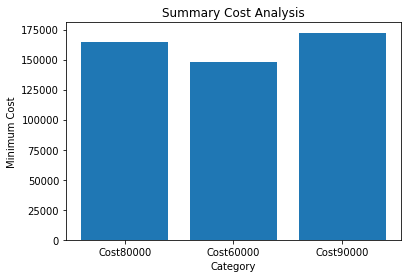

In [89]:
import matplotlib.pyplot as plt

x_axis = ['Cost80000', 'Cost60000', 'Cost90000']
y_axis = [MinCost_WithSupplierRisk_CostSensitivity80000, MinCost_WithSupplierRisk_CostSensitivity60000, MinCost_WithSupplierRisk_CostSensitivity90000]

plt.bar(x_axis, y_axis)
plt.title('Summary Cost Analysis')
plt.xlabel('Category')
plt.ylabel('Minimum Cost')
plt.show()